Install TextBlob

In [1]:
from textblob import TextBlob

Import nltk

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

Import Text

In [29]:
!pip install requests
import requests
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

Bring Text into TextBlob

In [30]:
blob = TextBlob(data)

Import Mask Oval

In [31]:
!pip install imageio[pyav]
import imageio
!wget -O image.png "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask = imageio.imread("image.png")

--2024-09-29 05:54:46--  https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png
Resolving media.cheggcdn.com (media.cheggcdn.com)... 18.160.78.65, 18.160.78.27, 18.160.78.10, ...
Connecting to media.cheggcdn.com (media.cheggcdn.com)|18.160.78.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13652 (13K) [image/png]
Saving to: ‘image.png’

image.png           100%[===================>]  13.33K  --.-KB/s    in 0.001s  

2024-09-29 05:54:47 (17.5 MB/s) - ‘image.png’ saved [13652/13652]



<ipython-input-31-ce608d08d9ca>:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask = imageio.imread("image.png")


Tokenize the Text

In [32]:
blob.words

WordList(['The', 'Project', 'Gutenberg', "'s", 'Etext', 'of', 'Shakespeare', "'s", 'First', 'Folio', 'The', 'Tragedie', 'of', 'Hamlet', 'THIS', 'EBOOK', 'WAS', 'ONE', 'OF', 'PROJECT', 'GUTENBERG', "'S", 'EARLY', 'FILES', 'PRODUCED', 'AT', 'A', 'TIME', 'WHEN', 'PROOFING', 'METHODS', 'AND', 'TOOLS', 'WERE', 'NOT', 'WELL', 'DEVELOPED', 'THERE', 'IS', 'AN', 'IMPROVED', 'EDITION', 'OF', 'THIS', 'TITLE', 'WHICH', 'MAY', 'BE', 'VIEWED', 'AS', 'EBOOK', '100', 'at', 'https', 'www.gutenberg.org/ebooks/100', 'This', 'is', 'our', '3rd', 'edition', 'of', 'most', 'of', 'these', 'plays', 'See', 'the', 'index', 'Copyright', 'laws', 'are', 'changing', 'all', 'over', 'the', 'world', 'be', 'sure', 'to', 'check', 'the', 'copyright', 'laws', 'for', 'your', 'country', 'before', 'posting', 'these', 'files', 'Please', 'take', 'a', 'look', 'at', 'the', 'important', 'information', 'in', 'this', 'header', 'We', 'encourage', 'you', 'to', 'keep', 'this', 'file', 'on', 'your', 'own', 'disk', 'keeping', 'an', 'elect

Loading Word Frequencies Data

In [48]:
import pandas as pd
from pathlib import Path
from wordcloud import WordCloud
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

Sort by Frequency

In [50]:
from operator import itemgetter
sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[1:21]

Get the Top 20 Words

In [51]:
df = pd.DataFrame(top20, columns = ['Word', 'Frequency'])
df

,Word,Frequency
0,lord,211
1,haue,175
2,king,173
3,shall,107
4,hamlet,106
5,come,106
6,thou,105
7,let,104
8,good,99
9,hor,95


Generate the Bar Graph

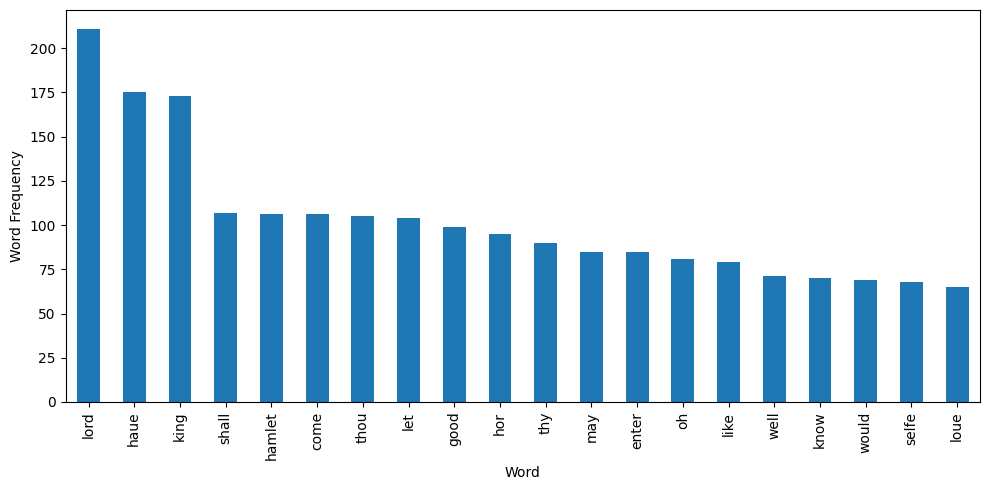

In [54]:
axes = df.plot.bar(x='Word', y='Frequency', legend = False, figsize=(10,5))
axes.set_ylabel("Word Frequency")
import matplotlib.pyplot as plt
plt.gcf().tight_layout()

Install Word Cloud Module and Loading Text

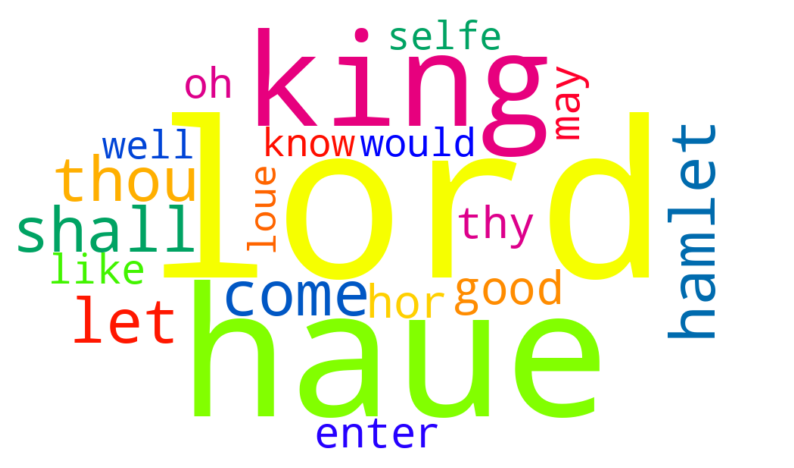

In [79]:
from wordcloud import WordCloud
wordcloud = WordCloud(colormap = 'prism', mask = mask, background_color = 'white')
frequencies = dict(zip(df['Word'], df['Frequency']))
wordcloud = wordcloud.generate_from_frequencies(frequencies)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Display Word Cloud